<a href="https://colab.research.google.com/github/JunyoungB/SmartCityBigData/blob/main/R4ds_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R for Data Science 실습 2 - Data wrangling and programing

## Data Wrangling (tidyr)

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Example datasets

In [2]:
table1

country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [3]:
table2

country,year,type,count
<chr>,<dbl>,<chr>,<dbl>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [4]:
table3

country,year,rate
<chr>,<dbl>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


In [5]:
table4a # N. cases

country,1999,2000
<chr>,<dbl>,<dbl>
Afghanistan,745,2666
Brazil,37737,80488
China,212258,213766


In [6]:
table4b # N. population

country,1999,2000
<chr>,<dbl>,<dbl>
Afghanistan,19987071,20595360
Brazil,172006362,174504898
China,1272915272,1280428583


## pivot_longer()

One variable might be spread across multiple columns

Apply pivot_longer() to table4a

In [7]:
table4a %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")

country,year,cases
<chr>,<chr>,<dbl>
Afghanistan,1999,745
Afghanistan,2000,2666
Brazil,1999,37737
Brazil,2000,80488
China,1999,212258
China,2000,213766


apply it to table4b

In [8]:
table4b %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")


country,year,population
<chr>,<chr>,<dbl>
Afghanistan,1999,19987071
Afghanistan,2000,20595360
Brazil,1999,172006362
Brazil,2000,174504898
China,1999,1272915272
China,2000,1280428583


Join two tables

In [9]:
tidy4a <- table4a %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")
tidy4b <- table4b %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")
left_join(tidy4a, tidy4b)

Joining with `by = join_by(country, year)`


country,year,cases,population
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


### Q: What is right_join? try right_join and study join methods

In [10]:
tidy4a <- table4a %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")
tidy4b <- table4b %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")
right_join(tidy4a, tidy4b)

Joining with `by = join_by(country, year)`


country,year,cases,population
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## Pivot_wider()

One observation might be scattered across multiple rows

In [11]:
table2

country,year,type,count
<chr>,<dbl>,<chr>,<dbl>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [12]:
table2 %>% pivot_wider(names_from = type, values_from = count)

country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


2.3.3 Exercises
1. Why are pivot_longer() and pivot_wider() not perfectly symmetrical?
Carefully consider the following example:
```
stocks <- tibble(
  year   = c(2015, 2015, 2016, 2016),
  half  = c(   1,    2,     1,    2),
  return = c(1.88, 0.59, 0.92, 0.17)
)
stocks %>%
  pivot_wider(names_from = year, values_from = return) %>%
  pivot_longer(`2015`:`2016`, names_to = "year", values_to = "return")
```
(Hint: look at the variable types and think about column names.)  
`pivot_longer()` has a `names_ptypes` argument, e.g.  `names_ptypes = list(year = double())`. What does it do?

2. Why does this code fail?
```
table4a %>%
  pivot_longer(c(1999, 2000), names_to = "year", values_to = "cases")
#> Error in `pivot_longer()`:
#> ! Can't subset columns past the end.
#> ℹ Locations 1999 and 2000 don't exist.
#> ℹ There are only 3 columns.
```

3. What would happen if you widen this table? Why? How could you add a new column to uniquely identify each value?
```
people <- tribble(
  ~name,             ~names,  ~values,
  #-----------------|--------|------
  "Phillip Woods",   "age",       45,
  "Phillip Woods",   "height",   186,
  "Phillip Woods",   "age",       50,
  "Jessica Cordero", "age",       37,
  "Jessica Cordero", "height",   156
)
```
4. Tidy the simple tibble below. Do you need to make it wider or longer? What are the variables?
```
preg <- tribble(
  ~pregnant, ~male, ~female,
  "yes",     NA,    10,
  "no",      20,    12
)
```

## Separating and Uniting

## separate()

One column contains two variables

In [24]:
table3

country,year,rate
<chr>,<dbl>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


In [25]:
table3 %>% separate(rate, into = c("cases", "population"))

country,year,cases,population
<chr>,<dbl>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [26]:
table3 %>% separate(rate, into = c("cases", "population")) %>% mutate(cases = as.numeric(cases), population = as.numeric(population))

country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [27]:
table3 %>% extract(rate, c("cases", "population"), regex = "([0-9]+)/([0-9]+)")

country,year,cases,population
<chr>,<dbl>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## unite()

Single variable is spread across multiple columns

In [28]:
table5

country,century,year,rate
<chr>,<chr>,<chr>,<chr>
Afghanistan,19,99,745/19987071
Afghanistan,20,00,2666/20595360
Brazil,19,99,37737/172006362
Brazil,20,00,80488/174504898
China,19,99,212258/1272915272
China,20,00,213766/1280428583


In [29]:
table5 %>%
  unite(new, century, year, sep = "")


country,new,rate
<chr>,<chr>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


12.4.3 Exercises
1. What do the extra and fill arguments do in separate()? Experiment with the various options for the following two toy datasets.
```
tibble(x = c("a,b,c", "d,e,f,g", "h,i,j")) %>%
  separate(x, c("one", "two", "three"))
```
```
tibble(x = c("a,b,c", "d,e", "f,g,i")) %>%
  separate(x, c("one", "two", "three"))
```
2. Both `unite()` and `separate()` have a `remove` argument. What does it do? Why would you set it to FALSE?

3. Compare and contrast `separate()` and `extract()`. Why are there three variations of separation (by position, by separator, and with groups), but only one unite?

# Functional Programming

In [30]:
df <- tibble(
  a = rnorm(10),
  b = rnorm(10),
  c = rnorm(10),
  d = rnorm(10)
)

In [32]:
df

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
-1.6046759,0.2335664,-1.6154147842,1.09057561
-1.9812627,-0.2666376,-0.1780287998,-0.75329892
0.2971022,-0.3776821,-0.2349187331,-1.80537947
-1.1252805,-0.6044888,-2.6299690194,0.17337821
0.6846090,-0.6546701,0.7854217040,1.18080442
1.4696067,1.2293948,0.8525084372,0.20972327
-0.4589193,-1.2742646,-0.6730441708,-0.95196406
-0.9461569,-0.4462466,-0.6520656554,1.25185639
1.0068450,0.2827553,0.0005066556,-0.01966623


In [34]:
median(df$a)
median(df$b)
median(df$c)
median(df$d)

[1] -0.4597822

[1] -0.3221598

[1] -0.4434922

[1] 0.07685599

Don't copy and paste multiple times  
You can iterate using for loops


In [35]:
output <- vector("double", ncol(df))  # 1. output
for (i in seq_along(df)) {            # 2. sequence
  output[[i]] <- median(df[[i]])      # 3. body
}
output


[1] -0.45978224 -0.32215984 -0.44349219  0.07685599

In [36]:
output <- c()
output


NULL

In [37]:
output <- c()
for (i in seq_along(df)) {            # 2. sequence
  output <- c( output, median(df[[i]]) )      # 3. body
}
output


[1] -0.45978224 -0.32215984 -0.44349219  0.07685599

In [38]:
install.packages("rbenchmark")
library(rbenchmark)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [40]:
simple1 <- function(n) {
  output <- vector("double", n)
  for(i in 1:n)
    output[i] = i
  return(output)
}

simple2 <- function(n) {
  output <- c()
  for(i in 1:n)
    output = c(output, i)
  return(output)
}

In [41]:
simple1(10)

[1]  1  2  3  4  5  6  7  8  9 10

In [42]:
simple2(10)

[1]  1  2  3  4  5  6  7  8  9 10

In [43]:
benchmark("fc1"=simple1(1000),
          "fc2"=simple2(1000),
          replications=100,
          columns=c('test', 'elapsed', 'replications'))

,test,elapsed,replications
,<chr>,<dbl>,<int>
1,fc1,0.007,100
2,fc2,0.239,100


In [44]:
239/7

[1] 34.14286

## for_loops vs functional

Possible to wrap up for loops in a function


In [46]:
col_mean <- function(df) {
  output <- vector("double", ncol(df))
  for (i in seq_along(df)) {
    output[[i]] <- mean(df[[i]])
  }
  output
}

col_median <- function(df) {
  output <- vector("double", ncol(df))
  for (i in seq_along(df)) {
    output[[i]] <- median(df[[i]])
  }
  output
}

col_sd <- function(df) {
  output <- vector("double", ncol(df))
  for (i in seq_along(df)) {
    output[[i]] <- sd(df[[i]])
  }
  output
}

col_mean(df)

[1] -0.31187777 -0.15862808 -0.52530810 -0.01270233

You can make function as a variable

In [47]:
col_summary <- function(df, fun) {
  out <- vector("double", length(df))
  for (i in seq_along(df)) {
    out[i] <- fun(df[[i]])
  }
  out
}
col_summary(df, median)


[1] -0.45978224 -0.32215984 -0.44349219  0.07685599

## The map function (purrr)

the purrr package provides a family of functions for looping patterns over a vector

remind apply()

In [48]:
str(df)

tibble [10 × 4] (S3: tbl_df/tbl/data.frame)
 $ a: num [1:10] -1.605 -1.981 0.297 -1.125 0.685 ...
 $ b: num [1:10] 0.234 -0.267 -0.378 -0.604 -0.655 ...
 $ c: num [1:10] -1.615 -0.178 -0.235 -2.63 0.785 ...
 $ d: num [1:10] 1.091 -0.753 -1.805 0.173 1.181 ...


In [49]:
df

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
-1.6046759,0.2335664,-1.6154147842,1.09057561
-1.9812627,-0.2666376,-0.1780287998,-0.75329892
0.2971022,-0.3776821,-0.2349187331,-1.80537947
-1.1252805,-0.6044888,-2.6299690194,0.17337821
0.6846090,-0.6546701,0.7854217040,1.18080442
1.4696067,1.2293948,0.8525084372,0.20972327
-0.4589193,-1.2742646,-0.6730441708,-0.95196406
-0.9461569,-0.4462466,-0.6520656554,1.25185639
1.0068450,0.2827553,0.0005066556,-0.01966623


In [50]:
df %>% map_dbl(mean)

a           b           c           d 
-0.31187777 -0.15862808 -0.52530810 -0.01270233

In [51]:
df %>% map(mean)

$a
[1] -0.3118778

$b
[1] -0.1586281

$c
[1] -0.5253081

$d
[1] -0.01270233

In [52]:
df %>% map_dbl(median)

a           b           c           d 
-0.45978224 -0.32215984 -0.44349219  0.07685599

In [55]:
mtcars %>% head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [56]:
mtcars %>%
  split(.$cyl)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2


You can define a function in map

In [57]:
f1 <- function(df) {
  lm(mpg ~ wt, data = df)
}

mtcars %>%
  split(.$cyl) %>%
  map(f1)

$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [58]:
mtcars %>%
  split(.$cyl) %>%
  map(function(df) lm(mpg ~ wt, data = df))

$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [59]:
mtcars %>%
  split(.$cyl) %>%
  map(~lm(mpg ~ wt, data = .))

$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [60]:
df %>% map_dbl(mean)

a           b           c           d 
-0.31187777 -0.15862808 -0.52530810 -0.01270233

In [61]:
df %>% map_dbl(~mean(.))

a           b           c           d 
-0.31187777 -0.15862808 -0.52530810 -0.01270233

## Extract Component

In [62]:
mtcars %>%
  split(.$cyl) %>%
  map(~lm(mpg ~ wt, data = .)) %>%
  map(summary)

$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1513 -1.9795 -0.6272  1.9299  5.2523 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   39.571      4.347   9.104 7.77e-06 ***
wt            -5.647      1.850  -3.052   0.0137 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.332 on 9 degrees of freedom
Multiple R-squared:  0.5086,	Adjusted R-squared:  0.454 
F-statistic: 9.316 on 1 and 9 DF,  p-value: 0.01374


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Residuals:
     Mazda RX4  Mazda RX4 Wag Hornet 4 Drive        Valiant       Merc 280 
       -0.1250         0.5840         1.9292        -0.6897         0.3547 
     Merc 280C   Ferrari Dino 
       -1.0453        -1.0080 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   28.409      4.184   6.789  0.00105 **
wt            -2.780      1.335  -2.083  0.09176 . 
---
Signif.

In [63]:
mtcars %>%
  split(.$cyl) %>%
  map(~lm(mpg ~ wt, data = .)) %>%
  map(summary) %>%
  map_dbl(~.$r.squared)

4         6         8 
0.5086326 0.4645102 0.4229655

In [64]:
mtcars %>%
  split(.$cyl) %>%
  map(~lm(mpg ~ wt, data = .)) %>%
  map(summary) %>%
  map_dbl('r.squared')


4         6         8 
0.5086326 0.4645102 0.4229655

In [68]:
 (lm(mpg~wt, data=mtcars) %>% summary())$r.squared

[1] 0.7528328

In [69]:
 (lm(mpg~wt, data=mtcars) %>% summary())['r.squared']

$r.squared
[1] 0.7528328

You can also use an integer to select elements by position

In [70]:
x <- list(list(1, 2, 3), list(4, 5, 6), list(7, 8, 9))
x %>% map_dbl(2)

[1] 2 5 8

Functional Programming is memory efficient by not saving internal calculations. Easier to understand if you get used to it.

Is it faster as well?

In [72]:
n_len = 10

In [73]:
rep(10,n_len)

[1] 10 10 10 10 10 10 10 10 10 10

In [74]:
rep(10,n_len) %>% map(rnorm)

[[1]]
 [1] -0.02875936  0.05743468  0.81906295 -0.50359958  1.06325778 -1.58867539
 [7] -1.66973032 -1.05962667  0.07695551  0.19142513

[[2]]
 [1] -0.40097665  0.15318423 -0.71182349 -1.58969436 -0.75773775  0.71602479
 [7] -0.06533812 -0.70192952 -0.87812670 -2.34379691

[[3]]
 [1] -0.40100222  1.50434855 -1.19425558  0.19400639 -2.94049948  0.46121697
 [7]  1.11660901 -0.06196959 -0.37489443  1.34408895

[[4]]
 [1] -0.14980797 -1.24305314  2.35709856  3.06127161 -1.11910062  1.23141000
 [7]  0.41117740 -0.48835170 -0.58859683  0.07168451

[[5]]
 [1]  0.19432653  1.16490826  1.93922420 -0.01481215  0.09131339 -2.58662849
 [7]  0.50672182  0.78962186 -0.58397170  0.04313322

[[6]]
 [1]  0.1795396  1.1181572 -1.0004446 -0.2819392  2.7750225  0.4686446
 [7]  0.2689702  1.4074812 -1.3753444  1.3143234

[[7]]
 [1] -0.786568503  0.444434513 -0.581392318 -0.695736582  0.003107445
 [6] -1.233470458  0.005844891 -0.004795238 -0.891031526 -0.076577713

[[8]]
 [1] -0.45719190  1.44150689 -0.03624892 -0.21183117  0.58925937  0.90872672
 [7] -0.02127727 -1.81193665  0.69968017  1.49790667

[[9]]
 [1]  0.98902086  0.62498521  0.03305428 -2.14025870  0.47200999 -0.40140890
 [7]  0.60358058 -0.48648098 -1.69374020 -0.58322539

[[10]]
 [1]  0.73703567  0.37366054 -0.69020119 -0.08144004 -1.36817163  0.60675720
 [7] -1.40824997  0.38724924 -0.70964208  1.63917376

In [75]:
rnorm(10)

[1]  1.4082482 -0.3456820  0.6541396  0.4476344 -1.4917576  0.1412876
 [7]  0.5286648 -0.4001192 -0.9159100 -0.7649905

In [76]:
df2 <- vector(mode = "list", length = n_len)
for (i in 1:n_len)
  df2[[i]] <- rnorm(10)
df2

[[1]]
 [1] -1.3583679  0.2493278  1.1244403  1.1607199 -1.0949538  1.1612599
 [7] -1.2621157  0.8952712 -0.7067721  0.2798363

[[2]]
 [1] -0.17538508 -2.04906459  0.17849102 -2.20306654  1.33218629  0.40730718
 [7] -0.56337575 -0.15902346 -0.03341722  0.77070794

[[3]]
 [1]  0.450442743  1.150212366  0.347403439 -0.882749478 -0.288287522
 [6] -1.484206525 -0.029955109  1.270259303  0.270910783 -0.004888295

[[4]]
 [1] -1.0111579  0.7449874  0.3137855  0.6864157 -1.6116030 -0.9724964
 [7] -0.4172203  0.3065063 -0.9282132 -0.5602775

[[5]]
 [1] -0.3457848 -0.9588856  0.1610003 -0.4711829  0.5167772 -0.3628792
 [7]  1.0488445 -0.1110991  3.3719704 -0.5900436

[[6]]
 [1] -0.68604431 -1.18620690 -0.07883626  0.09138033 -0.31987997  2.30781215
 [7]  0.98524188  0.13850140  1.26129287 -0.49840870

[[7]]
 [1]  0.33285969  0.36318727  0.25076790  0.07877722  1.06798320 -1.10820511
 [7] -1.51365240 -0.56189603 -1.51173340 -0.13717337

[[8]]
 [1]  0.4347285339 -0.5625555143  0.5902288209  0.5197377754  0.0004473527
 [6] -0.4280396588 -0.1489640712 -0.7604117442  0.2315994034  0.5489200914

[[9]]
 [1]  0.62426220  0.55067286 -0.91229404 -0.29012453  0.22715069 -0.09017077
 [7] -0.85260087  0.06984762  0.06476838  0.54114508

[[10]]
 [1] -0.2834267  0.5048800 -0.2906313 -1.3142597 -0.2132951  1.0532392
 [7] -0.5670201  0.5986273 -0.6247603  0.8357003

In [77]:
lapply(rep(10,n_len), rnorm)

[[1]]
 [1] -2.53728200 -2.17483779  0.03207592 -2.16421535  0.06668304 -1.76252738
 [7] -1.12280960 -0.21770115  1.73216127  0.78648237

[[2]]
 [1] -2.0021106 -1.2964111 -2.0160865 -1.5686124 -1.4726141 -2.3715800
 [7] -1.2039289  0.4811039 -0.2650704  0.1895882

[[3]]
 [1]  0.7628875  0.6739526 -0.5194380  1.2733167 -1.8506030 -0.7506863
 [7] -0.6763609  0.7636587 -0.1403653 -0.6111453

[[4]]
 [1] -0.7644401  0.7748816 -0.3728521 -0.4388757  0.6043260 -1.6817561
 [7]  1.1359636 -0.1417279 -1.0120823  1.4445782

[[5]]
 [1] -0.95890087  0.35612551  1.07539496  0.15601465 -0.65027198 -1.60400289
 [7]  0.01866012  0.91857647  0.62438274  2.12711461

[[6]]
 [1]  0.1990869 -0.6387063  1.0578365  0.7347076  1.0413822 -0.4899642
 [7]  0.6582370  0.7189620  0.8122936 -1.4115080

[[7]]
 [1]  0.4286084  0.3183070 -0.2427811  0.6073559 -0.2372173  0.7417519
 [7] -1.0072758 -1.0566304  2.7203297  0.1096303

[[8]]
 [1]  0.39163255  1.15229753 -0.19332182 -0.49484834 -0.03040503  0.79755820
 [7] -0.44172667 -1.44864014 -1.04510385  0.36361875

[[9]]
 [1] -0.5764943 -0.1102206  1.0235734 -0.2163898  1.1569627 -1.3277080
 [7] -1.4105483  0.4774037  0.6844222  0.3504604

[[10]]
 [1]  1.35731465  0.89932811 -0.39415266 -0.03773238 -0.28619529  0.33212997
 [7] -1.25169836  0.45605024 -1.36838568  0.16508594

In [79]:
gen1 <- function(n_len) {
  rep(10,n_len) %>% map(rnorm)
}
gen2 <- function(n_len) {
  df2 <- vector(mode = "list", length = n_len)
  for (i in 1:n_len)
    df2[[i]] <- rnorm(10)
  df2
}
gen3 <- function(n_len) {
  lapply(rep(10,n_len), rnorm )
}

In [80]:
benchmark("fc1"=gen1(1000),
          "fc2"=gen2(1000),
          "fc3"=gen3(1000),
          replications=100,
          columns=c('test', 'elapsed', 'replications'))

,test,elapsed,replications
,<chr>,<dbl>,<int>
1,fc1,0.350,100
2,fc2,0.191,100
3,fc3,0.242,100


# Something useful

In [82]:
diamonds

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49


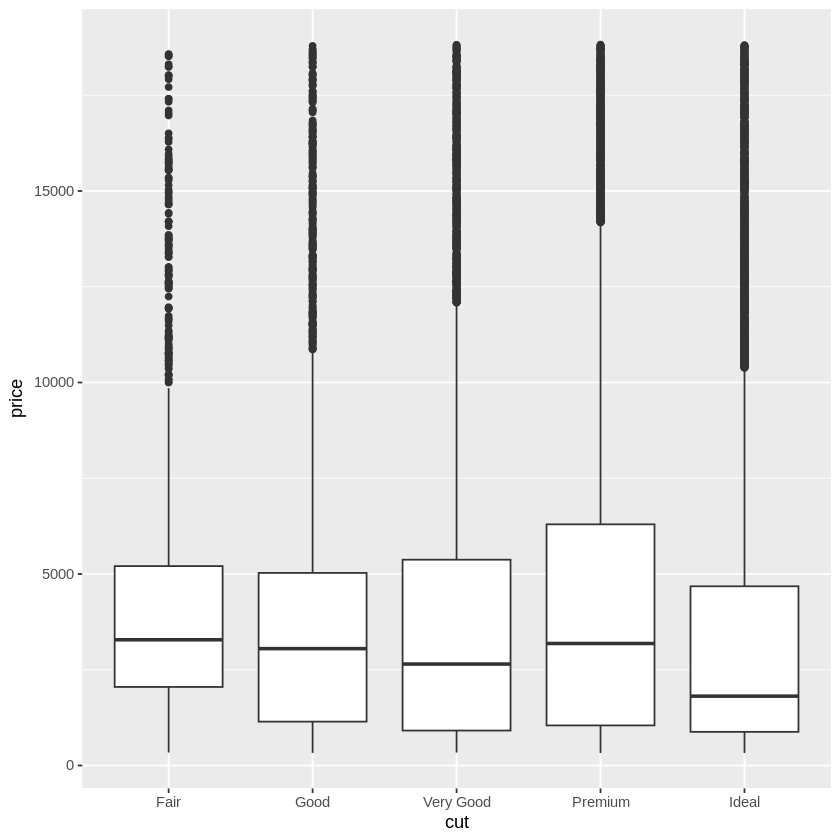

In [83]:
diamonds %>% ggplot(aes(cut, price)) + geom_boxplot()

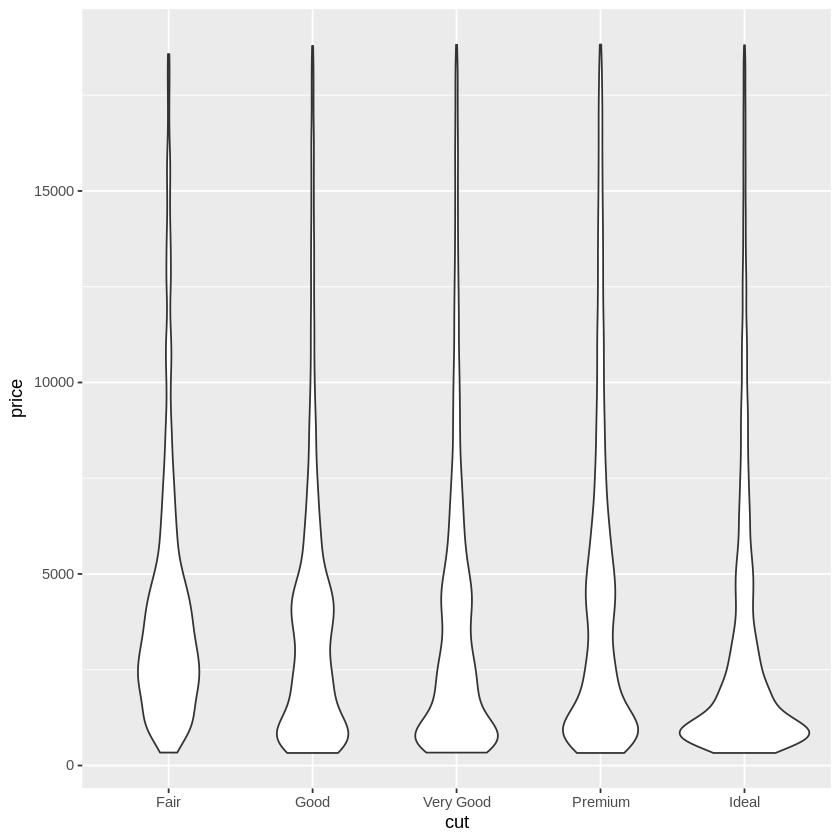

In [84]:
diamonds %>% ggplot(aes(cut, price)) + geom_violin()

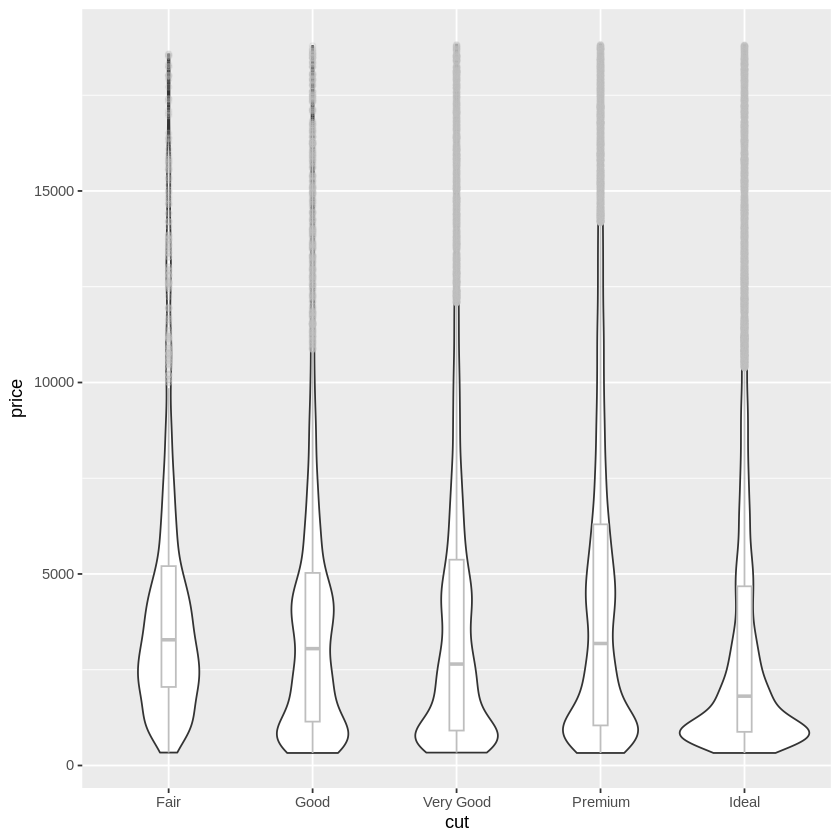

In [85]:
diamonds %>% ggplot(aes(cut, price)) + geom_violin() + geom_boxplot(width=0.1, color="grey", alpha=0.2)